In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

import sys
sys.path.append('../../modules')
from helper_functions import feature_reduction_x, rating_feature_conversion, heatmap


from datetime import datetime


In [ ]:
#balanced_dataset = '/../../data/training/ber-rating-dataset-final.csv' # final balanced dataset
balanced_dataset = '/../../data/training/ber-rating-dataset-final-split_0.csv' # 1st split of balanced dataset
balanced_dataset_1 = '/../../data/training/ber-rating-dataset-final-split_1.csv' # 1st split of balanced dataset
balanced_dataset_2 = '/../../data/training/ber-rating-dataset-final-split_2.csv' # 2nd split of balanced dataset
balanced_dataset_3 = '/../../data/training/ber-rating-dataset-final-split_3.csv' # 3rd split of balanced dataset

current_folder = os.path.abspath('.')

df = pd.read_table(current_folder + balanced_dataset, sep=";", encoding='cp437', header=0, on_bad_lines="warn")
df_1 = pd.read_table(current_folder + balanced_dataset_1, sep=";", encoding='cp437', header=0, on_bad_lines="warn")
df_2 = pd.read_table(current_folder + balanced_dataset_2, sep=";", encoding='cp437', header=0, on_bad_lines="warn")
#df_3 = pd.read_table(current_folder + balanced_dataset_3, sep=";", encoding='cp437', header=0, on_bad_lines="warn")

df = pd.concat([df, df_2, df_1], ignore_index=True, sort=False)

In [2]:
#df = pd.read_csv("https://github.com/jbyrneirl/BER-Rating-AI-Model/raw/main/data/training/ber-rating-dataset-final-split_0.csv", sep=';', on_bad_lines="skip", low_memory=False)

#df = pd.read_csv("https://github.com/jbyrneirl/BER-Rating-AI-Model/raw/main/data/training/BERRating_test_data.csv", sep=';', on_bad_lines="skip", low_memory=False)

np.random.seed(0)

X = feature_reduction_x(df)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X = imp.transform(X)
y = df.BerRating


X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=2)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 54  65 115 118 119 120 128 129 130] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [3]:
start_time = datetime.now()
model = Ridge()
model.fit(X_train , y_train)
y_hat = model.predict(X_test)
end_time = datetime.now()

score = model.score(X_test, y_test)



y_con = rating_feature_conversion(y_test.to_numpy())

Score:  0.871337724432104 

0.4252
Processing Time: 0:00:00.045976


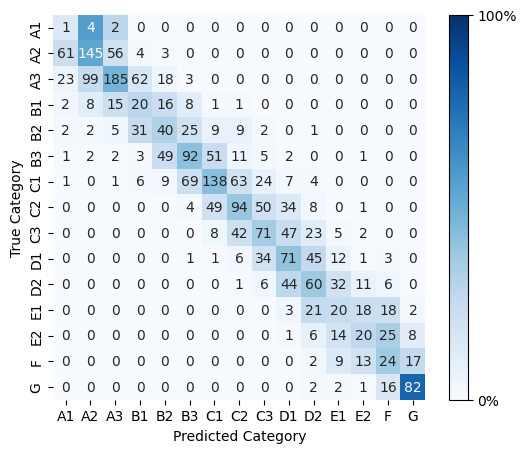

              precision    recall  f1-score   support

          A1       0.01      0.14      0.02         7
          A2       0.56      0.54      0.55       269
          A3       0.70      0.47      0.56       390
          B1       0.16      0.28      0.20        71
          B2       0.30      0.32      0.31       126
          B3       0.46      0.42      0.44       219
          C1       0.54      0.43      0.48       322
          C2       0.41      0.39      0.40       240
          C3       0.37      0.36      0.36       198
          D1       0.34      0.41      0.37       174
          D2       0.35      0.38      0.36       160
          E1       0.21      0.24      0.23        82
          E2       0.29      0.27      0.28        74
           F       0.26      0.37      0.31        65
           G       0.75      0.80      0.77       103

    accuracy                           0.43      2500
   macro avg       0.38      0.39      0.38      2500
weighted avg       0.47   

In [4]:
print("Score: ", score, "\n")

y_hat_con = rating_feature_conversion(y_hat)
cm = confusion_matrix(y_con, y_hat_con)


#print("CM")
#print(cm)

print(accuracy_score(y_con, y_hat_con))

print('Processing Time: {}'.format(end_time - start_time))

heatmap(cm)

print(classification_report(y_con, y_hat_con))

In [5]:
from scipy.special import softmax
from helper_functions import feature_reduction_y_grid

#X2 = feature_reduction_y_grid(df)
#imp.fit(X2)
#X2 = imp.transform(X2)

y2 = df.EnergyRating
y_grid = pd.get_dummies(y2)
#softmax(X, y2, Ridge())
#X2_train, X2_test, y2_train, y2_test = train_test_split( X2, y_grid, random_state=2)
X2_train, X2_test, y2_train, y2_test = train_test_split( X, y_grid, random_state=2)

start_time2 = datetime.now()
model = Ridge()
model.fit(X2_train , y2_train)
y_hat2 = model.predict(X2_test)
y_hat_bal = pd.DataFrame(softmax(y_hat2, axis=1), columns = y_grid.columns)
#print(y_hat_bal)
y_true_hat = y_hat_bal.idxmax(axis=1)
end_time2 = datetime.now()
#print(y_hat_bal.idxmax(axis=1))

In [6]:
#Using softmax
#print(y2_test.idxmax(axis=1))
#print(y_true_hat)
y2_test_con = y2_test.idxmax(axis=1)

cm2 = confusion_matrix(y2_test_con, y_true_hat)

print("CM")
print(cm2)

print(accuracy_score(y2_test_con, y_true_hat))

print('Processing Time: {}'.format(end_time2 - start_time2))

CM
[[  3   4   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 191  77   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 100 273   2   2  13   1   0   0   0   0   0   0   0   0]
 [  0  12  10   4   8  28   8   1   0   0   0   0   0   0   0]
 [  0   6   4   4   6  73  27   0   1   4   1   0   0   0   0]
 [  0   0   3   5   2  80 103  15   4   5   1   0   0   0   1]
 [  0   1   0   1   3  63 181  44   5  21   1   0   0   0   2]
 [  0   0   0   2   2  22 106  63  11  26   5   0   0   0   3]
 [  0   0   0   3   1   9  56  53  15  42  12   0   0   1   6]
 [  0   0   1   0   0   3  30  43  21  48  18   0   0   0  10]
 [  0   0   0   0   0   3   9  17  18  47  36   0   0   2  28]
 [  0   0   2   0   0   1   0   4   0  14  29   0   0   0  32]
 [  0   0   1   0   0   0   0   2   3  12  18   1   0   0  37]
 [  0   0   0   0   0   0   0   1   1   3  21   0   0   0  39]
 [  0   0   0   0   0   0   0   0   0   1  11   0   0   1  90]]
0.396
Processing Time: 0:00:00.039761
